# Sentiment Analysis Model Comparison
This notebook will guide you through loading and preprocessing a dataset, training different models (Logistic Regression, Naive Bayes, Random Forest), and visualizing the results. We will compare the models based on accuracy, precision, and recall.

## Step 1: Setup and Imports
In this step, we import the necessary libraries and define the paths to our dataset and model files.



In [14]:
import os
import pandas as pd
from src.preprocessing import preprocess_data, load_data, save_vectorizer
from src.model import train_naive_bayes, train_logistic_regression, train_random_forest
from src.evaluation import evaluate_model, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Navigate up one level to the project root and then into the 'src' directory
sys.path.append(os.path.abspath('..'))


# Define paths
DATA_PATH = os.path.join('..', 'data', 'imdb_reviews.csv')

VECTORIZER_PATH = os.path.join('..', 'models', 'tfidf_vectorizer.pkl') 


MODEL_LR = os.path.join('..', 'models', 'logistic_regression_model.pkl') 

MODEL_BN = os.path.join('..', 'models', 'naive_bayes_model.pkl') 

MODEL_RF = os.path.join('..', 'models', 'random_forest_model.pkl') 



## Step 2: Load the Data
We load the dataset using the `load_data()` function and display the first few rows of the dataset to understand its structure.


In [15]:
# Load data
df = load_data(DATA_PATH)

# Show the first few rows of the dataframe
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Step 3: Preprocess the Data
The dataset is preprocessed by splitting it into training and testing sets. Additionally, we save the vectorizer used to transform the text data into features. We also display a sample of the preprocessed training data.


In [16]:
# Preprocess data
(X_train, X_test, y_train, y_test), vectorizer = preprocess_data(df)

# Save the vectorizer for future use
save_vectorizer(vectorizer, VECTORIZER_PATH)

# Display dataset info and a sample of processed data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Sample of processed training data:")
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_train_df.head()



Training data shape: (40000, 5000)
Test data shape: (10000, 5000)
Sample of processed training data:


,aaron,abandoned,abc,abilities,ability,able,absence,absent,absolute,absolutely,...,youll,young,younger,youre,youth,youve,zero,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.090154,0.0,0.0,0.0,0.0,0.068947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.072296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def plot_confusion_matrix(model, X_test, y_test, title):
    """Plots confusion matrix with a custom title."""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)  # Set the custom title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## Step 4: Train and Evaluate Logistic Regression
We train a Logistic Regression model on the training data, evaluate it using accuracy, precision, and recall, and then plot the confusion matrix for the model.






Logistic Regression Results:
Accuracy: 0.8850
Precision: 0.8723
Recall: 0.9041


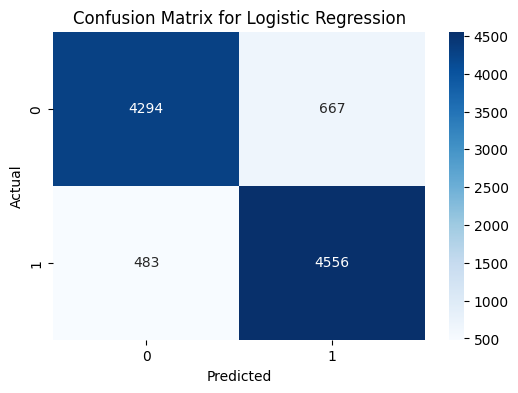

In [33]:
# Train and evaluate Logistic Regression
lr_model = train_logistic_regression(X_train, y_train)
lr_accuracy, lr_precision, lr_recall = evaluate_model(lr_model, X_test, y_test)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")

# Plot confusion matrix for Logistic Regression

plot_confusion_matrix(lr_model, X_test, y_test,"Confusion Matrix for Logistic Regression")


## Step 5: Train and Evaluate Naive Bayes
We now train a Naive Bayes model, evaluate it, and plot the confusion matrix.


Naive Bayes Results:
Accuracy: 0.8484
Precision: 0.8486
Recall: 0.8510


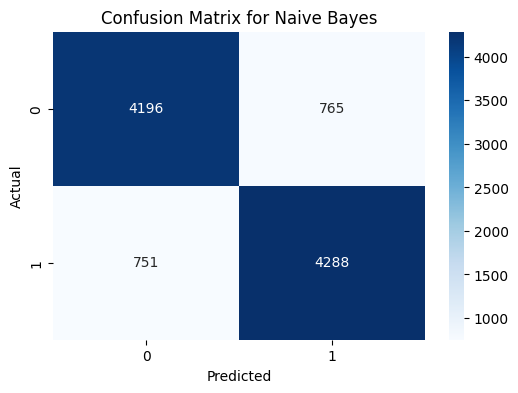

In [35]:
# Train and evaluate Naive Bayes
nb_model = train_naive_bayes(X_train, y_train)
nb_accuracy, nb_precision, nb_recall = evaluate_model(nb_model, X_test, y_test)

# Print results
print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_model, X_test, y_test,"Confusion Matrix for Naive Bayes")


## Step 6: Train and Evaluate Random Forest
Finally, we train a Random Forest model, evaluate it, and plot its confusion matrix.


Random Forest Results:
Accuracy: 0.8492
Precision: 0.8591
Recall: 0.8383


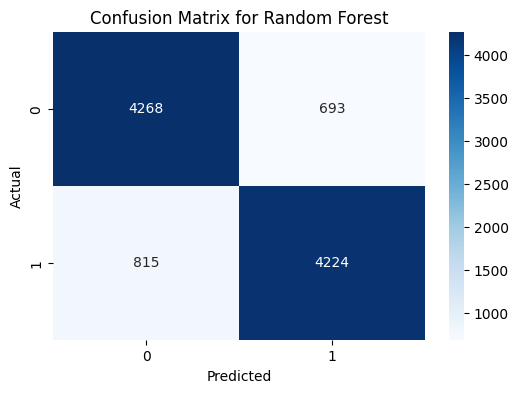

In [36]:

# Train and evaluate Random Forest
rf_model = train_random_forest(X_train, y_train)
rf_accuracy, rf_precision, rf_recall = evaluate_model(rf_model, X_test, y_test)

# Print results
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_model, X_test, y_test,"Confusion Matrix for Random Forest")


## Step 7: Summary and Visualization
We summarize the evaluation metrics (accuracy, precision, recall) for all models and plot comparison charts.


In [11]:
# Load the models
model_path_lr = os.path.join('..', 'models', 'logistic_regression_model.pkl')
model_path_nb = os.path.join('..', 'models', 'naive_bayes_model.pkl')
model_path_rf = os.path.join('..', 'models', 'random_forest_model.pkl')


with open(model_path_lr, 'rb') as f:
    logistic_model = pickle.load(f)

with open(model_path_nb, 'rb') as f:
    naive_bayes_model = pickle.load(f)

with open(model_path_rf, 'rb') as f:
    random_forest_model = pickle.load(f)



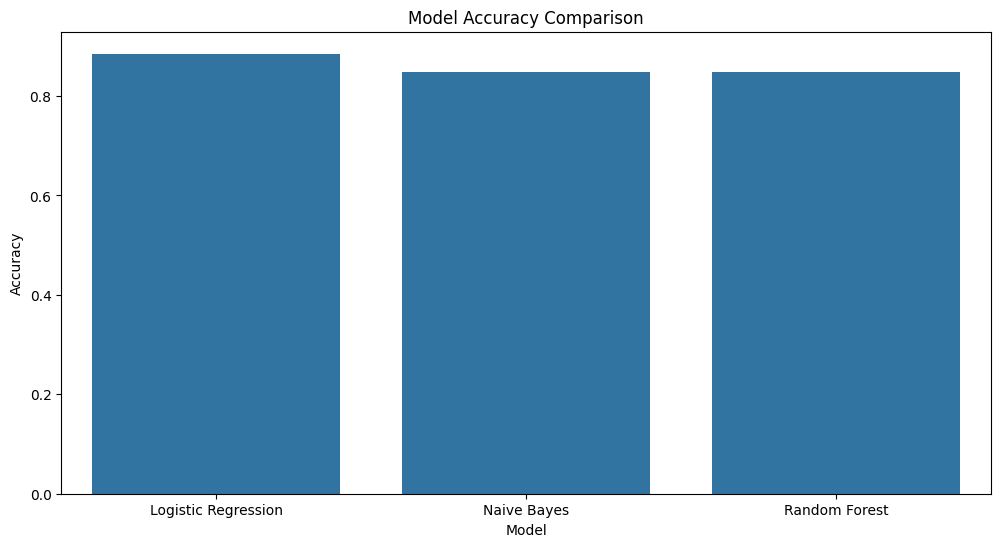

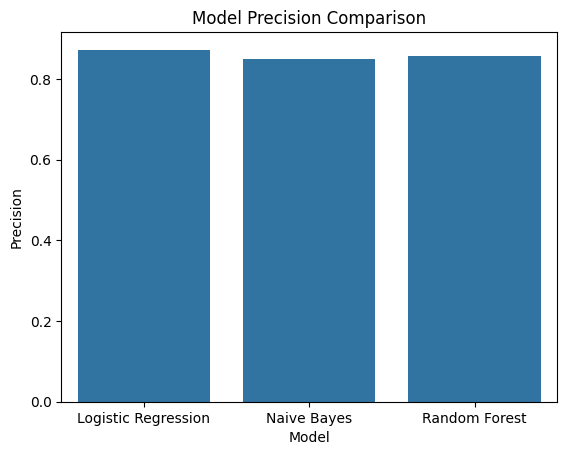

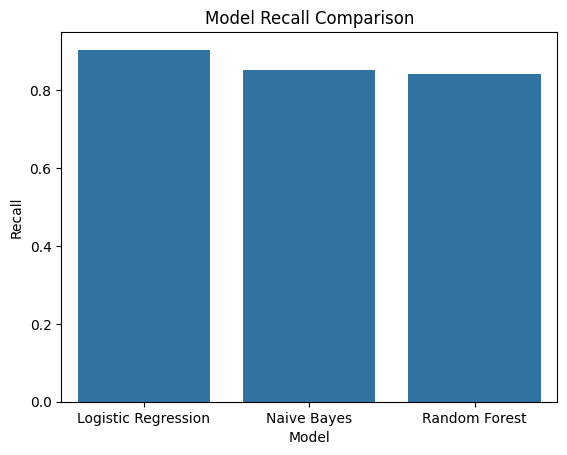

In [19]:
# Summary of the results
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [lr_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [lr_precision, nb_precision, rf_precision],
    'Recall': [lr_recall, nb_recall, rf_recall]
}

results_df = pd.DataFrame(results)

# Show the summary
results_df

# Visualization of performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.show()

sns.barplot(x='Model', y='Precision', data=results_df)
plt.title('Model Precision Comparison')
plt.show()

sns.barplot(x='Model', y='Recall', data=results_df)
plt.title('Model Recall Comparison')
plt.show()
